In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [1]:
# import necessary lib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation


In [7]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv', encoding='latin1')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[df.columns[:12]]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [12]:
# We need to use the strip module first because some values in this dataset still contain spaces at the beginning or end of string.
df["date_added"] = df["date_added"].str.strip()

# convert dtype to datetime 
df["date_added"] = pd.to_datetime(df['date_added'])

# extract month and year
df['month_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [13]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

<Axes: ylabel='count'>

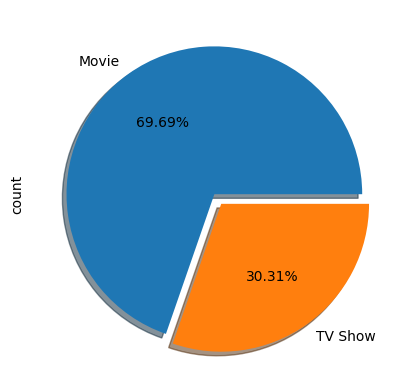

In [15]:
df["type"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.08], shadow = True)

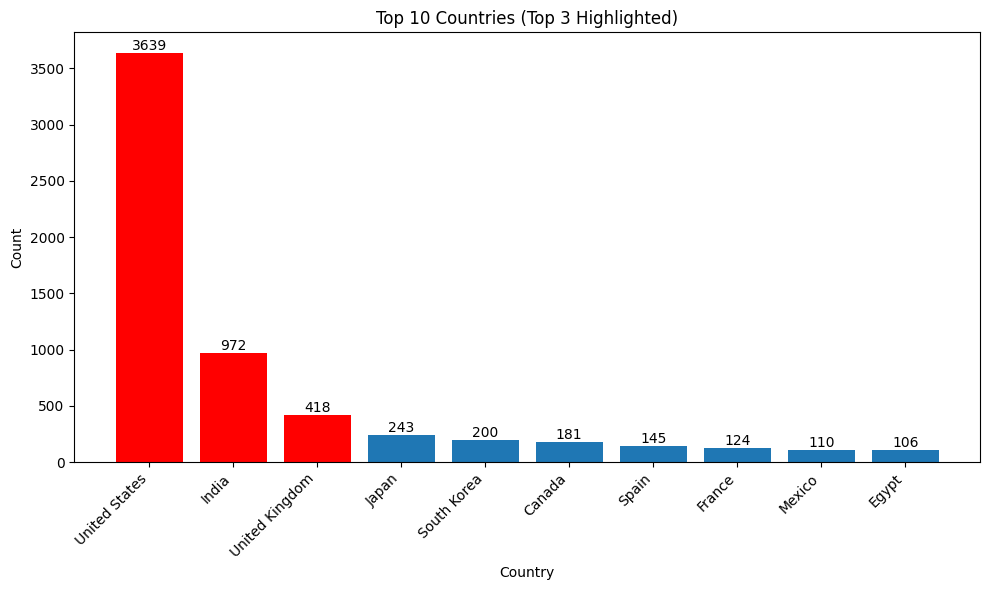

In [16]:
country_counts = df['country'].value_counts().head(10)  # Top 10 countries

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
bars = plt.bar(country_counts.index, country_counts.values)

# Add count values on top of bars
for bar, count in zip(bars, country_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha='center', va='bottom')

# Highlight top 3 countries
plt.bar(country_counts.index[:3], country_counts.values[:3], color='red')  # Adjust color

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries (Top 3 Highlighted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [17]:
# Count movies and TV shows per country
movie_counts_country = df[df['type'] == 'Movie']['country'].value_counts()
tv_show_counts_country = df[df['type'] == 'TV Show']['country'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_country, 'TV Show': tv_show_counts_country})
df_counts['total_by_country'] = df_counts.sum(axis=1)

# Sort by total count in descending order and select top 10
top_10_counts = df_counts.sort_values(by='total_by_country', ascending=False).head(10)

# Print the top 10 countries with movie, TV show, and total counts
print(top_10_counts)

                 Movie  TV Show  total_by_country
country                                          
United States   2495.0   1144.0            3639.0
India            893.0     79.0             972.0
United Kingdom   206.0    212.0             418.0
Japan             76.0    167.0             243.0
South Korea       41.0    159.0             200.0
Canada           122.0     59.0             181.0
Spain             97.0     48.0             145.0
France            75.0     49.0             124.0
Mexico            70.0     40.0             110.0
Egypt             92.0     14.0             106.0


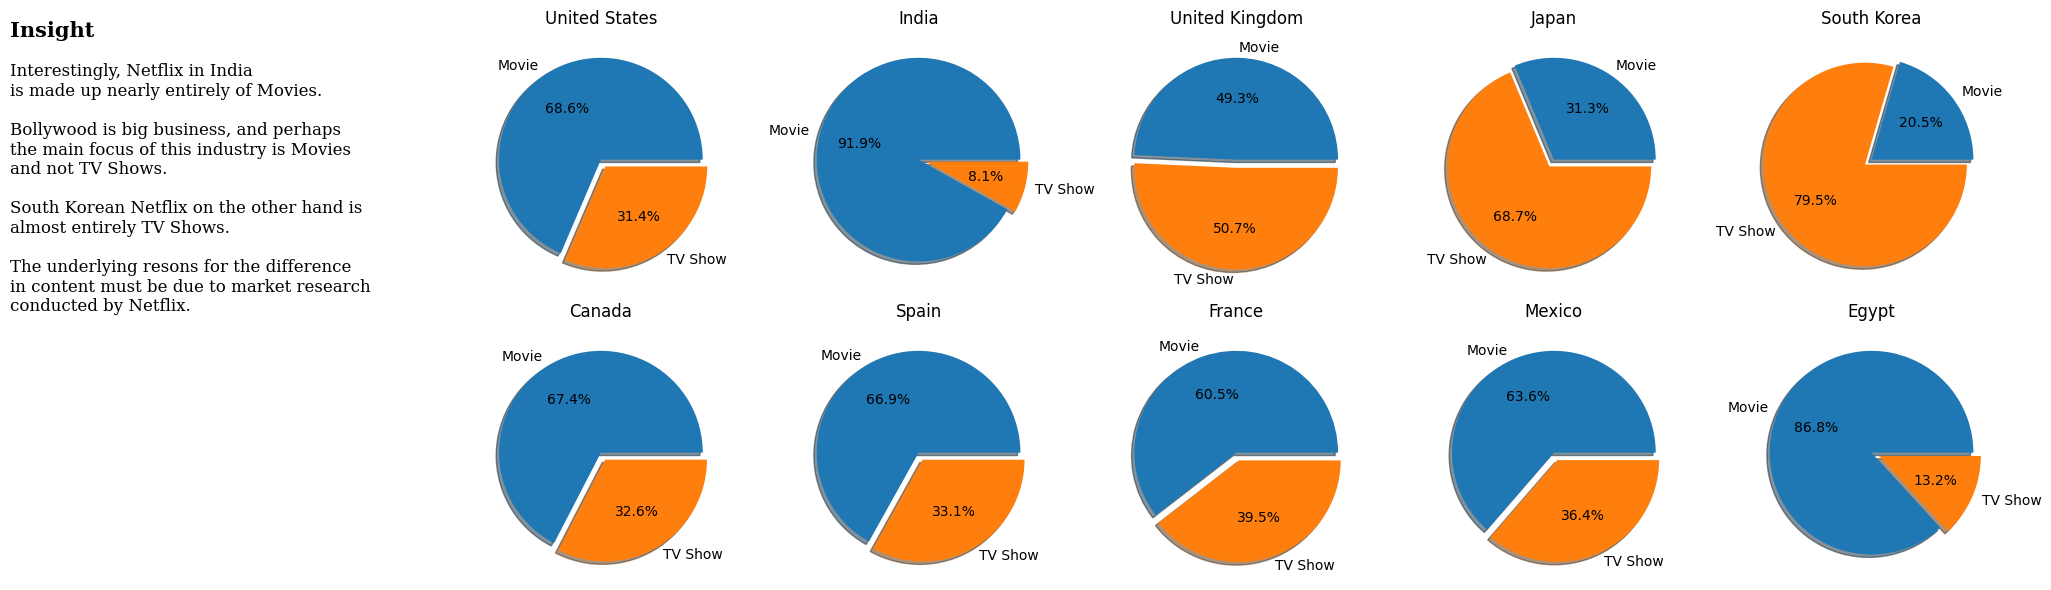

In [18]:
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(16, 6))  # Adjust figsize for better visualization

# Counter to keep track of subplot position
counter = 0

# Loop through each row (country) in the DataFrame
for country, row in top_10_counts.iterrows():
  # Extract movie, tv show, and total counts
  movie_count = row['Movie']
  tv_show_count = row['TV Show']
  total_count = row['total_by_country']

  # Create labels for pie chart slices
  labels = ['Movie', 'TV Show']

  # Create pie chart slice sizes
  sizes = [movie_count, tv_show_count]

  # Select the current subplot based on counter
  ax = axes[counter // cols, counter % cols]

  # Create a pie chart on the selected subplot
  ax.pie(sizes, labels=labels, autopct="%1.1f%%", explode = [0,0.08], shadow = True)
  ax.set_title(country)

  # Increase counter for next subplot position
  counter += 1

fig.text(-0.28, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(-0.28, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')


# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()

In [19]:
# Count movies and TV shows per country
movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts['total_by_type'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

print(rating_agg)

          Movie  TV Show  total_by_type
rating                                 
TV-MA      2062   1144.0         3206.0
TV-14      1427    730.0         2157.0
TV-PG       540    321.0          861.0
R           797      2.0          799.0
PG-13       490      NaN          490.0
TV-Y7       139    194.0          333.0
TV-Y        131    175.0          306.0
PG          287      NaN          287.0
TV-G        126     94.0          220.0
NR           75      4.0           79.0
G            41      NaN           41.0
TV-Y7-FV      5      1.0            6.0
NC-17         3      NaN            3.0
UR            3      NaN            3.0
A             1      NaN            1.0


In [20]:
df = df[df['rating'] != 'A']
# Count movies and TV shows per country
movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts['total_by_type'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

print(rating_agg)

          Movie  TV Show  total_by_type
rating                                 
TV-MA      2062   1144.0         3206.0
TV-14      1427    730.0         2157.0
TV-PG       540    321.0          861.0
R           797      2.0          799.0
PG-13       490      NaN          490.0
TV-Y7       139    194.0          333.0
TV-Y        131    175.0          306.0
PG          287      NaN          287.0
TV-G        126     94.0          220.0
NR           75      4.0           79.0
G            41      NaN           41.0
TV-Y7-FV      5      1.0            6.0
NC-17         3      NaN            3.0
UR            3      NaN            3.0


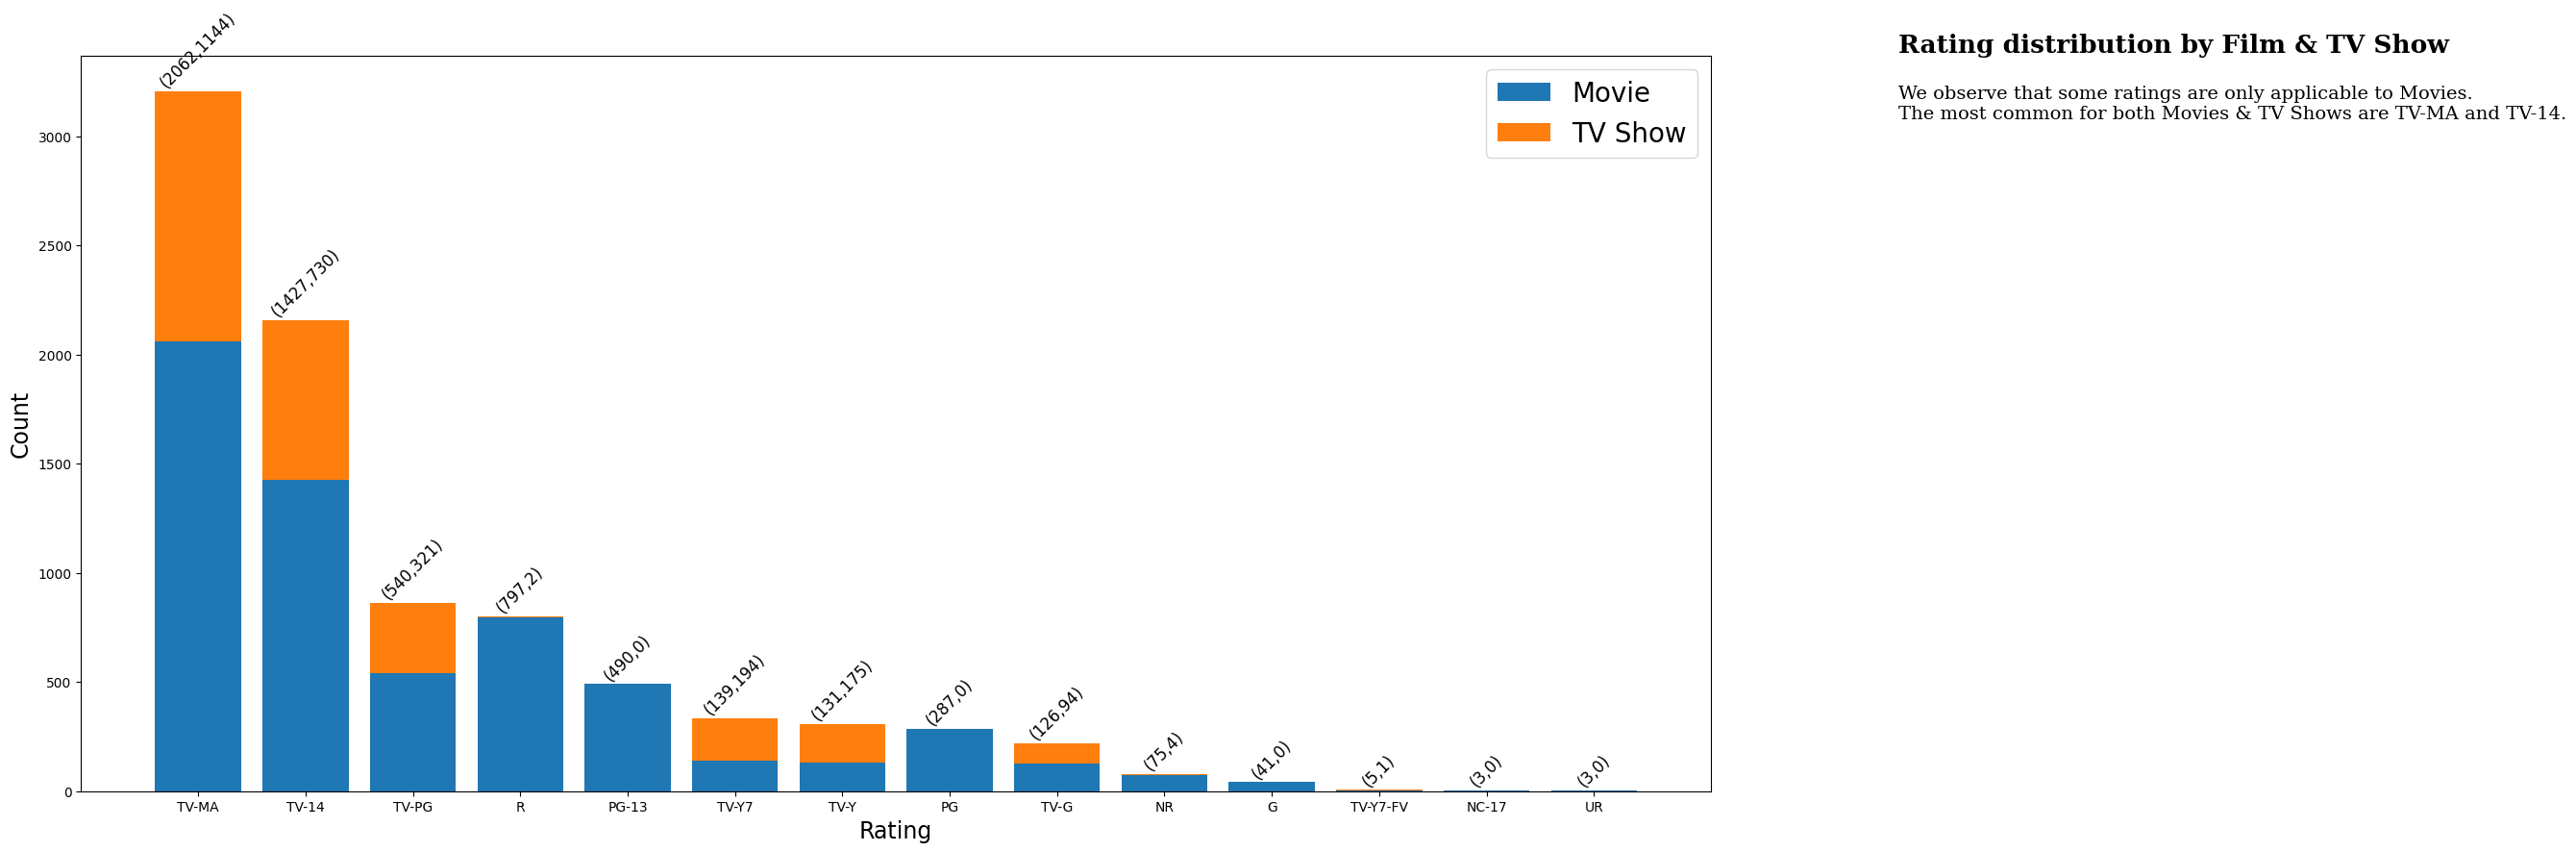

In [21]:
movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

# Combine counts into a single DataFrame with total
df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts.fillna(0, inplace=True)  # Fill missing values with 0
df_counts['total_by_type'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

# Create dual stacked bar chart
fig, ax = plt.subplots(figsize=(18, 9))
ax.bar(rating_agg.index, rating_agg['Movie'], label='Movie')
ax.bar(rating_agg.index, rating_agg['TV Show'], bottom=rating_agg['Movie'], label='TV Show')

# Add total labels on top of each stack
for idx, row in rating_agg.iterrows():
    total_label = f"({int(row['Movie'])},{int(row['TV Show'])})"
    y_pos = row['Movie'] + row['TV Show']  # Adjust based on bar width
    ax.text(idx, y_pos, total_label, ha='center', va='bottom', fontsize=12, rotation=45)  # Customize label position and size

# Customize chart appearance
ax.set_xlabel('Rating', fontsize = 17)
ax.set_ylabel('Count', fontsize = 17)
ax.legend(loc='upper right', prop={'size': 20})
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
ax.legend(loc='upper right', prop={'size': 20})

fig.text(1.1, 0.93, 'Rating distribution by Film & TV Show', fontsize=19, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.83, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''
, fontsize=14, fontweight='light', fontfamily='serif')

plt.show()

In [22]:
# Count movies and TV shows per year_added
movie_counts_year = df[df['type'] == 'Movie']['year_added'].value_counts()
tv_show_counts_year = df[df['type'] == 'TV Show']['year_added'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_year, 'TV Show': tv_show_counts_year})
df_counts['total_by_year'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='year_added', ascending=False)

print(rating_agg)

             Movie  TV Show  total_by_year
year_added                                
2024           NaN      1.0            1.0
2021         993.0    505.0         1498.0
2020        1284.0    595.0         1879.0
2019        1424.0    592.0         2016.0
2018        1237.0    411.0         1648.0
2017         836.0    349.0         1185.0
2016         251.0    175.0          426.0
2015          56.0     26.0           82.0
2014          19.0      5.0           24.0
2013           6.0      5.0           11.0
2012           3.0      NaN            3.0
2011          13.0      NaN           13.0
2010           1.0      NaN            1.0
2009           2.0      NaN            2.0
2008           1.0      1.0            2.0


In [23]:
df = df[df['year_added'] != 2024]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  month_added   8790 non-null   object        
 13  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 995.7+ KB


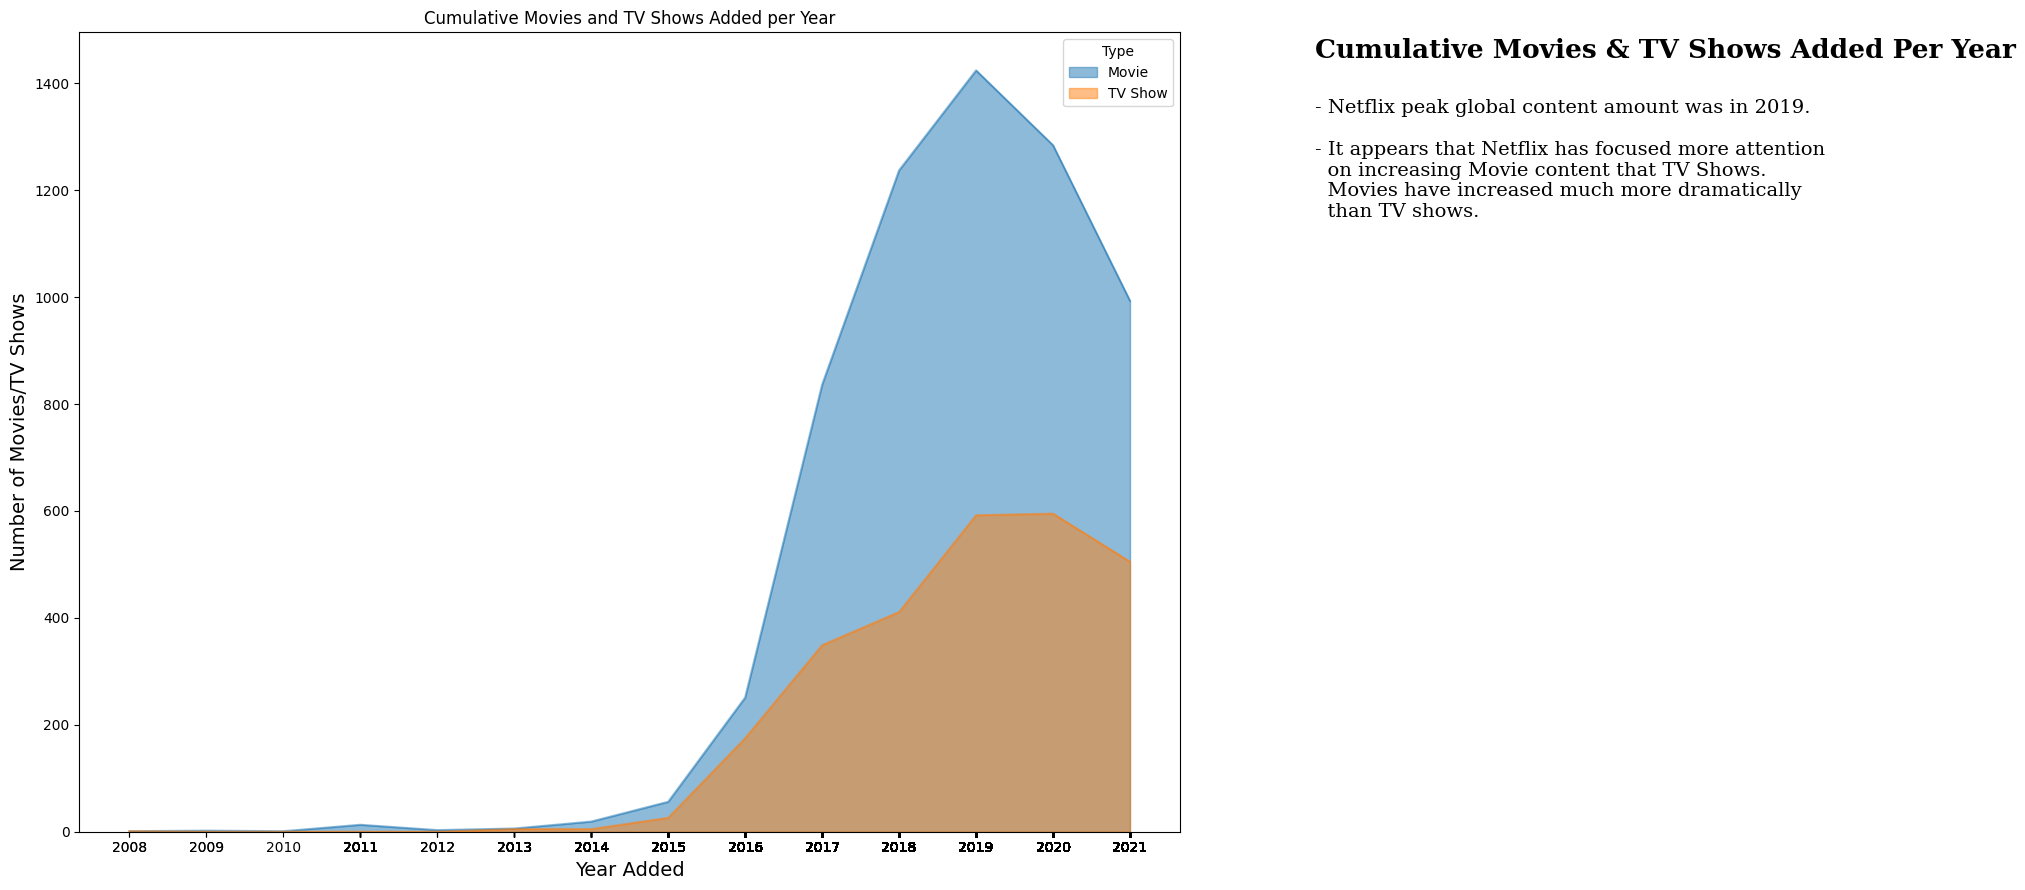

In [24]:
df_grouped = df.groupby(['year_added', 'type'])['type'].count().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))
df_grouped.plot(kind='area', stacked=False, ax=ax)
ax.set_title('Cumulative Movies and TV Shows Added per Year')
ax.set_xlabel('Year Added',fontsize = 14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize = 14)
ax.legend(title='Type')

plt.xticks(df['year_added'])
plt.tight_layout()

fig.text(1.1, 0.93, 'Cumulative Movies & TV Shows Added Per Year', fontsize=19, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.73, 
'''- Netflix peak global content amount was in 2019.

- It appears that Netflix has focused more attention
  on increasing Movie content that TV Shows. 
  Movies have increased much more dramatically
  than TV shows.
'''
, fontsize=14, fontweight='light', fontfamily='serif')
         
plt.show()

In [25]:
# Count movies and TV shows per month_added
movie_counts_month = df[df['type'] == 'Movie']['month_added'].value_counts()
tv_show_counts_month = df[df['type'] == 'TV Show']['month_added'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_month, 'TV Show': tv_show_counts_month})
df_counts['total_by_month'] = df_counts.sum(axis=1)

# Sort by total count in descending order
month_agg = df_counts.sort_values(by='total_by_month', ascending=False)

print(month_agg)

             Movie  TV Show  total_by_month
month_added                                
July           565      262             827
December       547      265             812
September      518      251             769
April          549      214             763
October        545      215             760
August         518      236             754
March          528      213             741
January        545      192             737
June           492      236             728
November       498      207             705
May            439      193             632
February       382      180             562


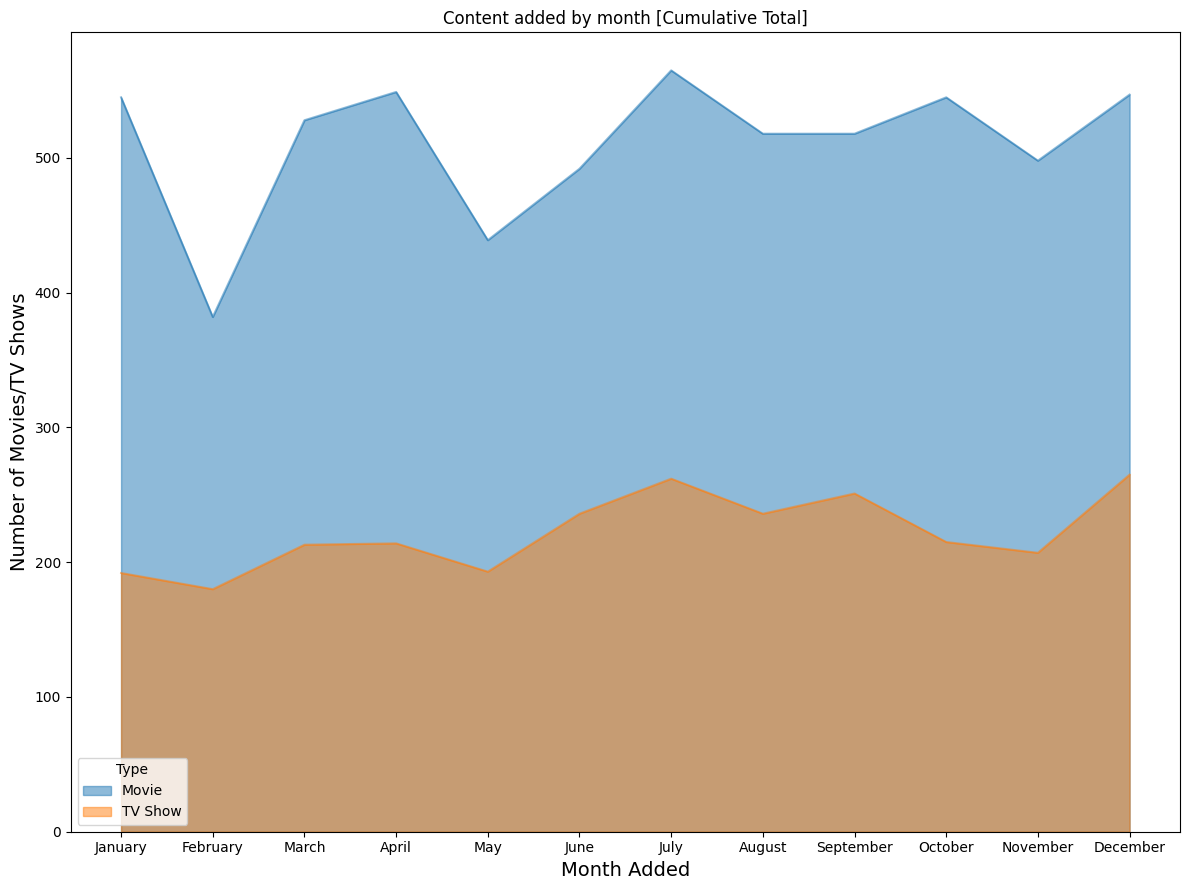

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)

df_grouped = df.groupby(['month_added', 'type'])['type'].count().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))
df_grouped.plot(kind='area', stacked=False, ax=ax)
ax.set_title('Content added by month [Cumulative Total]')
ax.set_xlabel('Month Added',fontsize = 14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize = 14)
ax.legend(title='Type')
plt.xticks(range(len(month_order)), month_order)

plt.tight_layout()
plt.show()

In [27]:
# mapping data rating to rating ages
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()
print(df['target_ages'].unique())

['Teens' 'Adults' 'Older Kids' 'Kids']


In [29]:
df_grouped = df.groupby(['country', 'target_ages'])['type'].count().unstack(fill_value=0)

# Combine counts into a single DataFrame with total
df_grouped['Total'] = df_grouped.sum(axis=1)

# Sort by total count in descending order
df_grouped = df_grouped.sort_values(by='Total', ascending=False)

# Show Target ages proportion of total content by top 10 countries
top_10_countries = df_grouped.head(10)
prop_of_total = top_10_countries.div(top_10_countries['Total'], axis=0) * 100

# Round percentages to 2 decimal places
prop_of_total = prop_of_total.round(2)

print(prop_of_total)

prop_of_total = prop_of_total.drop('Total', axis=1)
           

target_ages     Adults   Kids  Older Kids  Teens  Total
country                                                
United States    46.45   8.44       19.52  25.59  100.0
India            26.03   1.44       15.53  57.00  100.0
United Kingdom   51.20  10.05       19.62  19.14  100.0
Japan            35.80   1.23       24.69  38.27  100.0
South Korea      44.22   2.51       11.56  41.71  100.0
Canada           44.20  17.68       22.10  16.02  100.0
Spain            84.14   2.07        4.14   9.66  100.0
France           66.94   9.68        5.65  17.74  100.0
Mexico           77.27   1.82        8.18  12.73  100.0
Egypt            27.36   0.94        3.77  67.92  100.0


<Figure size 1800x900 with 0 Axes>

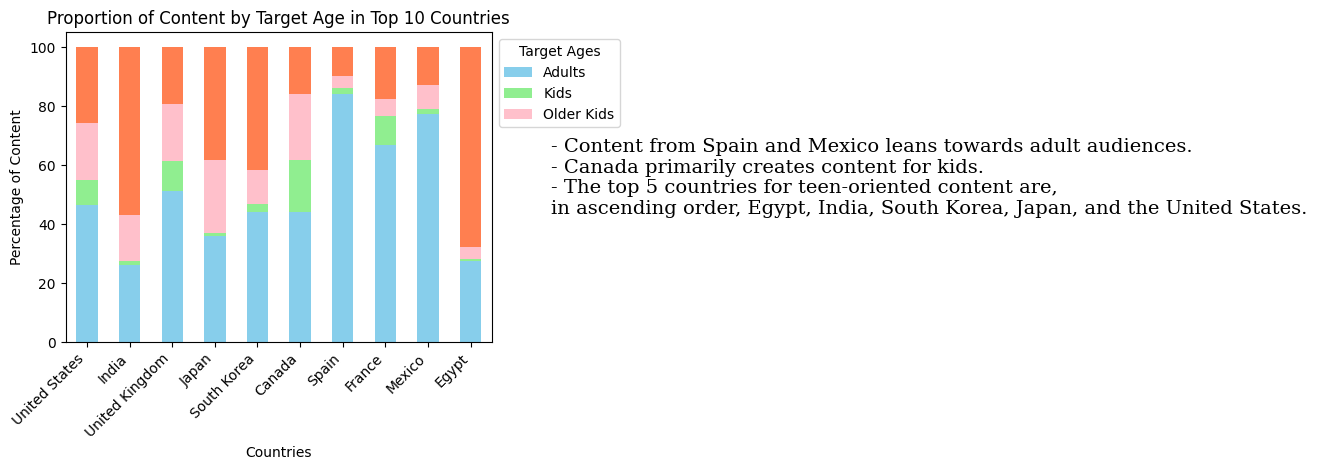

In [30]:
# Extract data for target ages (excluding 'Total' column)
target_ages = prop_of_total.columns[:-1]
countries = prop_of_total.index

# Create a stacked bar chart
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed
prop_of_total.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'pink', 'coral'])
plt.xlabel('Countries')
plt.ylabel('Percentage of Content')
plt.title('Proportion of Content by Target Age in Top 10 Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add informative text using figtext
plt.figtext(
    0.83,  # Centered horizontally (0=left, 1=right)
    0.5,  # Slightly above bottom (0=bottom, 1=top)
    """
    - Content from Spain and Mexico leans towards adult audiences.
    - Canada primarily creates content for kids.
    - The top 5 countries for teen-oriented content are, 
    in ascending order, Egypt, India, South Korea, Japan, and the United States.
    """,
    fontsize=14,
    fontweight='light',
    fontfamily='serif',
)

plt.legend(title='Target Ages', labels=target_ages, loc='upper left', bbox_to_anchor=(1, 1))  # Add legend

# Display the chart
plt.tight_layout()

plt.show()